<a href="https://www.kaggle.com/code/amenallahlahmar/zombie-apocalypse-classification-models?scriptVersionId=121775710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zombie-apocalypse/zombies.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # supress warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('/kaggle/input/zombie-apocalypse/zombies.csv')

**So the world is facing a zombie apocalypse. that's why the Centers for Disease Control and Prevention  recommends storing water, food, medication, tools, sanitation items, clothing, essential documents, and first aid supplies.
thank god for a group of brave data collectors who went  to check on 200 randomly selected adults who were alive before the zombies.
We have recent data for the 200 on age and sex, how many are in their household, and their rural, suburban, or urban location.
Now it's our job to figure out which supplies are associated with safety!**

# [](http://)**let's start with exploring our data** 

In [3]:
data.head(10)


,zombieid,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,1,Human,18,Female,Rural,1,0,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
1,2,Human,18,Male,Rural,3,24,Food,Medication,tools,First aid supplies,Sanitation,Clothing,NaN
2,3,Human,18,Male,Rural,4,16,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
3,4,Human,19,Male,Rural,1,0,Food,Medication,tools,No first aid supplies,Sanitation,Clothing,NaN
4,5,Human,19,Male,Urban,1,0,Food,Medication,No tools,First aid supplies,Sanitation,NaN,NaN
5,6,Human,19,Female,Urban,1,0,Food,Medication,tools,First aid supplies,Sanitation,Clothing,NaN
6,7,Human,20,Female,Suburban,2,0,No food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
7,8,Human,20,Female,Rural,2,0,Food,No medication,No tools,No first aid supplies,Sanitation,Clothing,NaN
8,9,Human,21,Female,Urban,1,8,No food,No medication,tools,First aid supplies,Sanitation,Clothing,Documents
9,10,Human,21,Female,Rural,2,8,No food,No medication,tools,First aid supplies,Sanitation,Clothing,Documents


In [4]:
data.shape

(200, 14)

In [5]:
data.columns

Index(['zombieid', 'zombie', 'age', 'sex', 'rurality', 'household', 'water',
       'food', 'medication', 'tools', 'firstaid', 'sanitation', 'clothing',
       'documents'],
      dtype='object')

zombie: human or zombie

age: age in years

sex: male or female

rurality: rural, suburban, or urban

household: number of people living in household

water: gallons of clean water available

food: food or no food

medication: medication or no medication

tools: tools or no tools

firstaid: first aid or no first aid

sanitation: sanitation or no sanitation

clothing: clothing or no clothing

documents: documents or no documents

**let's check the unique values in our features**

In [6]:
data=data.drop("zombieid",axis=1)

for i in data.columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "zombie":
 ['Human' 'Zombie']
unique values in "age":
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 50 53 54 56 57 58 59 60 61 62 63 65 67 68 69 71 72
 74 75 77 81 49 51 64 66 73 78 80 76 82 85]
unique values in "sex":
 ['Female' 'Male']
unique values in "rurality":
 ['Rural' 'Urban' 'Suburban']
unique values in "household":
 [1 3 4 2 5 6]
unique values in "water":
 [ 0 24 16  8 40 18 11  9]
unique values in "food":
 ['Food' 'No food']
unique values in "medication":
 ['Medication' 'No medication']
unique values in "tools":
 ['No tools' 'tools']
unique values in "firstaid":
 ['First aid supplies' 'No first aid supplies']
unique values in "sanitation":
 ['Sanitation' 'No sanitation']
unique values in "clothing":
 ['Clothing' nan]
unique values in "documents":
 [nan 'Documents']


In [7]:
data.info()# columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zombie      200 non-null    object
 1   age         200 non-null    int64 
 2   sex         200 non-null    object
 3   rurality    200 non-null    object
 4   household   200 non-null    int64 
 5   water       200 non-null    int64 
 6   food        200 non-null    object
 7   medication  200 non-null    object
 8   tools       200 non-null    object
 9   firstaid    200 non-null    object
 10  sanitation  200 non-null    object
 11  clothing    126 non-null    object
 12  documents   66 non-null     object
dtypes: int64(3), object(10)
memory usage: 20.4+ KB


In [8]:
data.describe()#mean,max,min and quartiles of the numerical features

,age,household,water
count,200.000000,200.000000,200.000000
mean,44.415000,2.680000,8.750000
std,17.371865,1.263162,12.069626
min,18.000000,1.000000,0.000000
25%,29.000000,2.000000,0.000000
50%,42.000000,2.500000,8.000000
75%,58.000000,4.000000,8.000000
max,85.000000,6.000000,40.000000


In [9]:
#seperating the categoricals and the numericals features to make it easier when visualizing our data
numeric=[]
for i in data.columns:
    if data[i].dtype=='int64':
        numeric.append(i)

        

        
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)

***data understanding 
visualizing distributions***

we started with the distribution plots for all the data

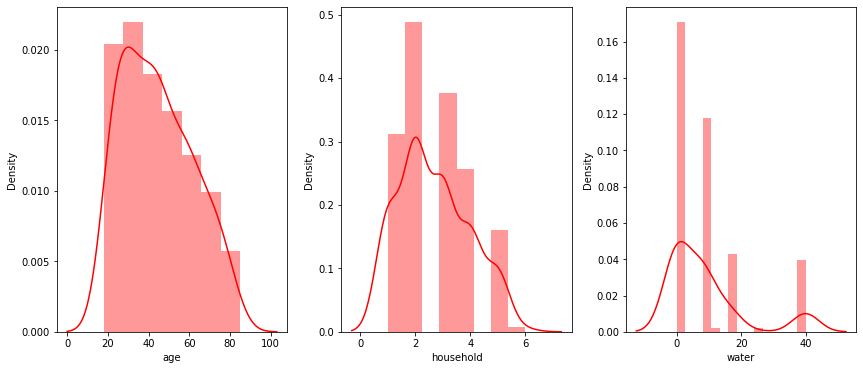

In [10]:

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column],color="red")
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**now let's take a look on the distribution plots for each class to compare between a zombie and a human**

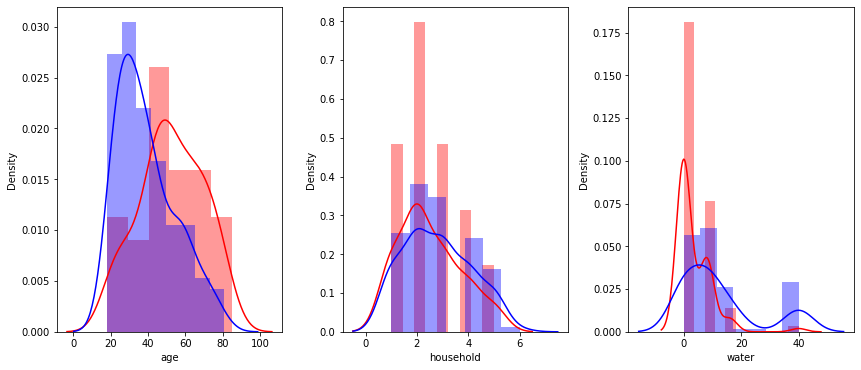

In [11]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column][data.zombie=="Zombie"],color="red")
        sns.distplot(data[column][data.zombie=="Human"],color="blue")
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**we can conclude that those who turned into zombies were older and had less available clean water.**

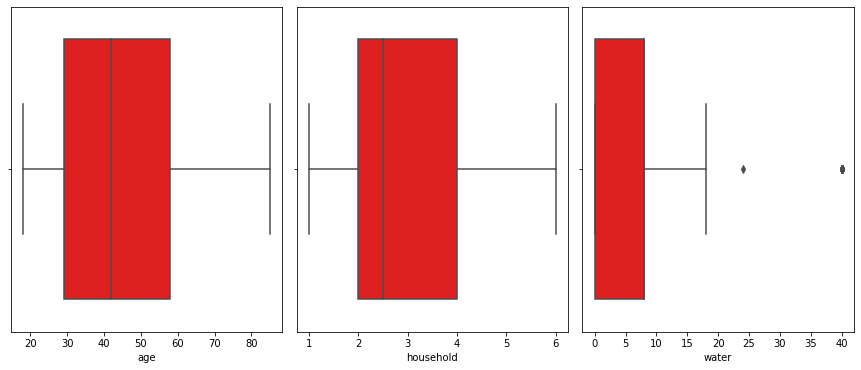

In [12]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(data[column],color="red")
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**we have found some outliers in water but for now we cant do nothing about it because maybe some people had water more than the average**

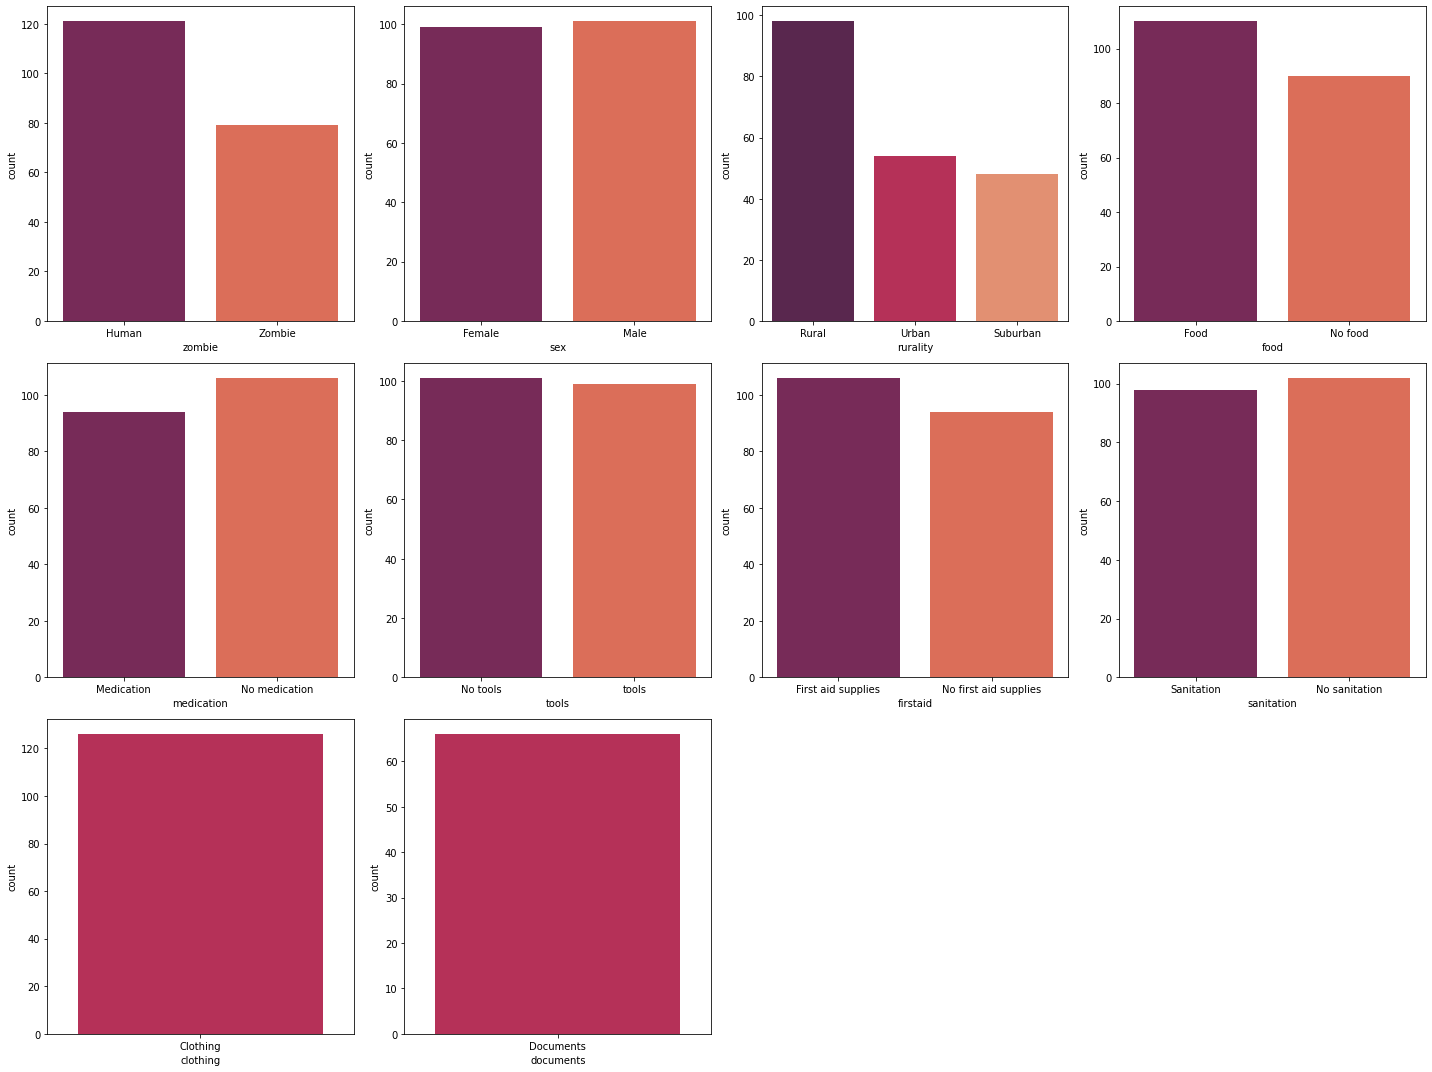

In [13]:
plt.figure(figsize = (20, 15))#visualizing categoricals using countplots
plotnumber = 1

for column in categoricals:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket') 
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

it is really strange that the documents and clothing column has only two values one of them is nan so using an imputation here well only lead us to find one value'clothing' and 'documents' but after a little bit of research i've found out that in this dataset particullary the data collectors  recorded those without clothing or documents as missing values rather than No clothing or No documents.so we will change this Nans with No clothing and No documents

**categoricals countplots after correcting the documents and clothing issues**

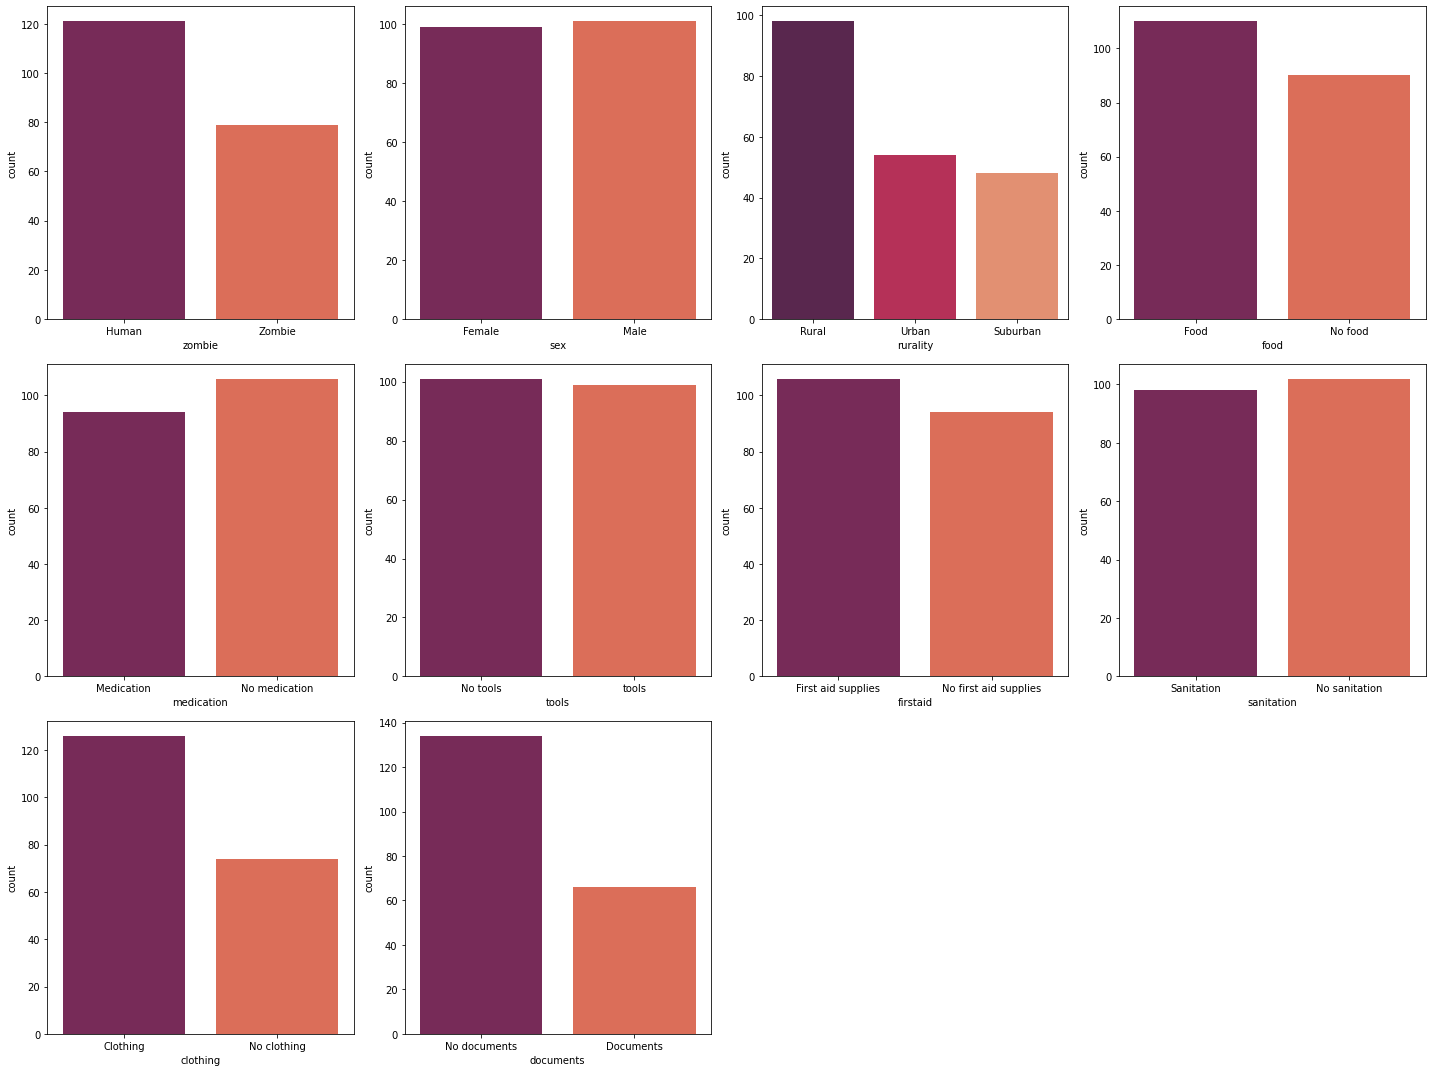

In [14]:
data['clothing'].fillna('No clothing', inplace=True)
data['documents'].fillna('No documents', inplace=True)
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categoricals:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

now this makes more sense 

**categoricals count plots for the class Human**

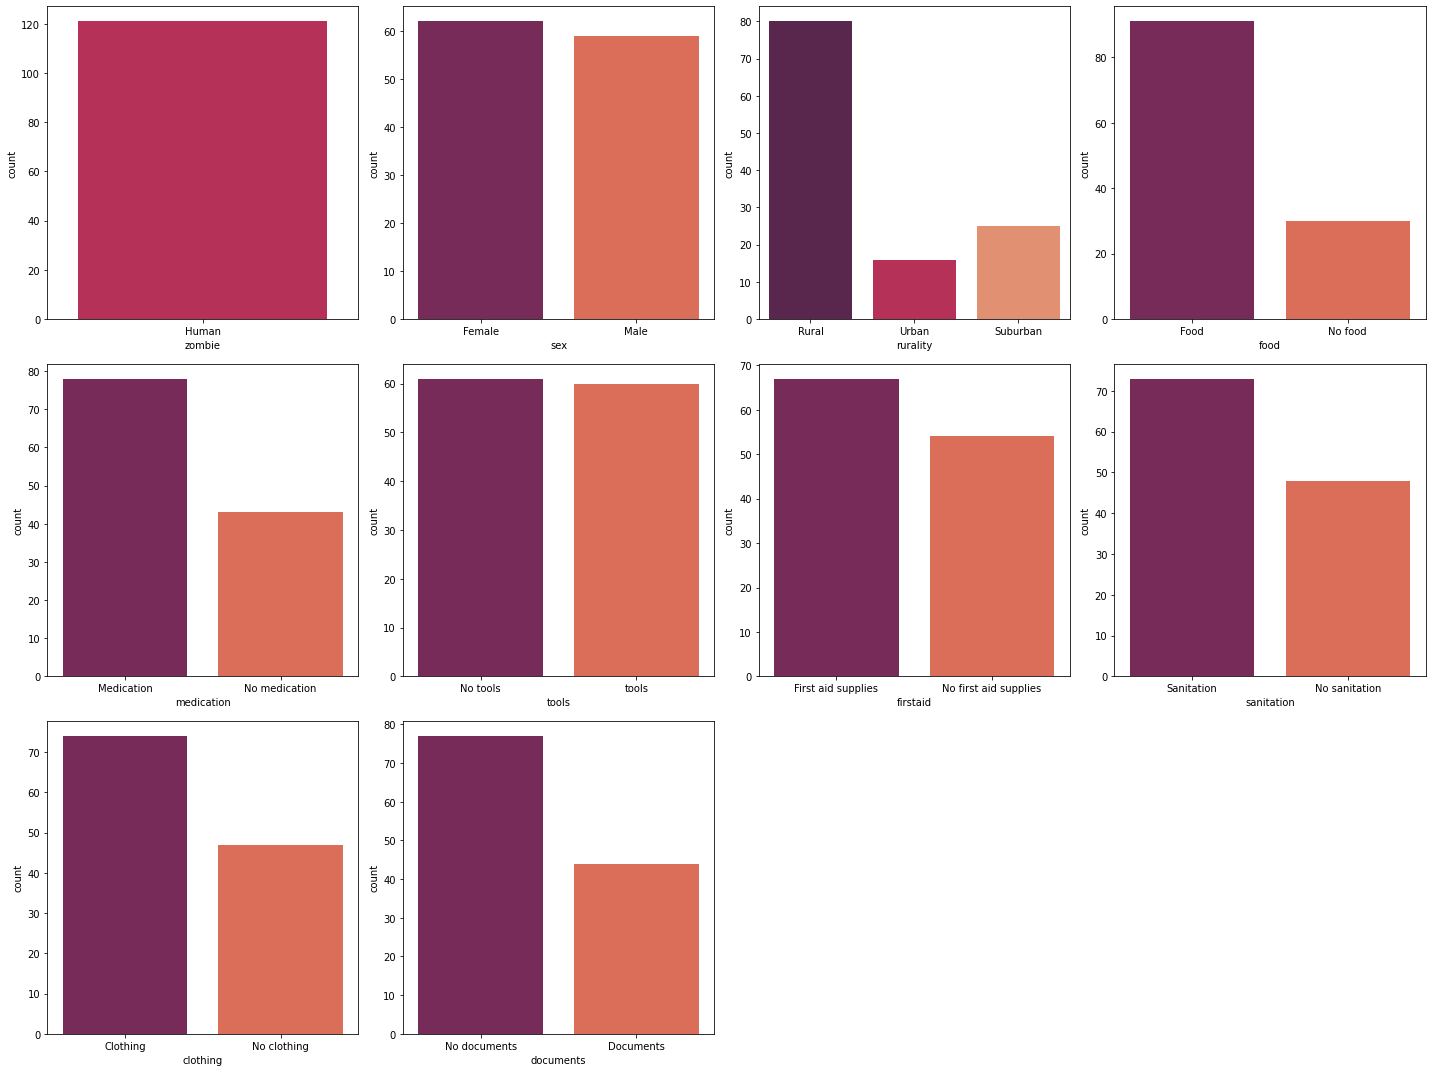

In [15]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categoricals:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column][data.zombie=="Human"], palette = 'rocket')
        plt.xlabel(column)
      
        
    plotnumber += 1



plt.tight_layout()
plt.show()


**categoricals count plots for the class Zombie **

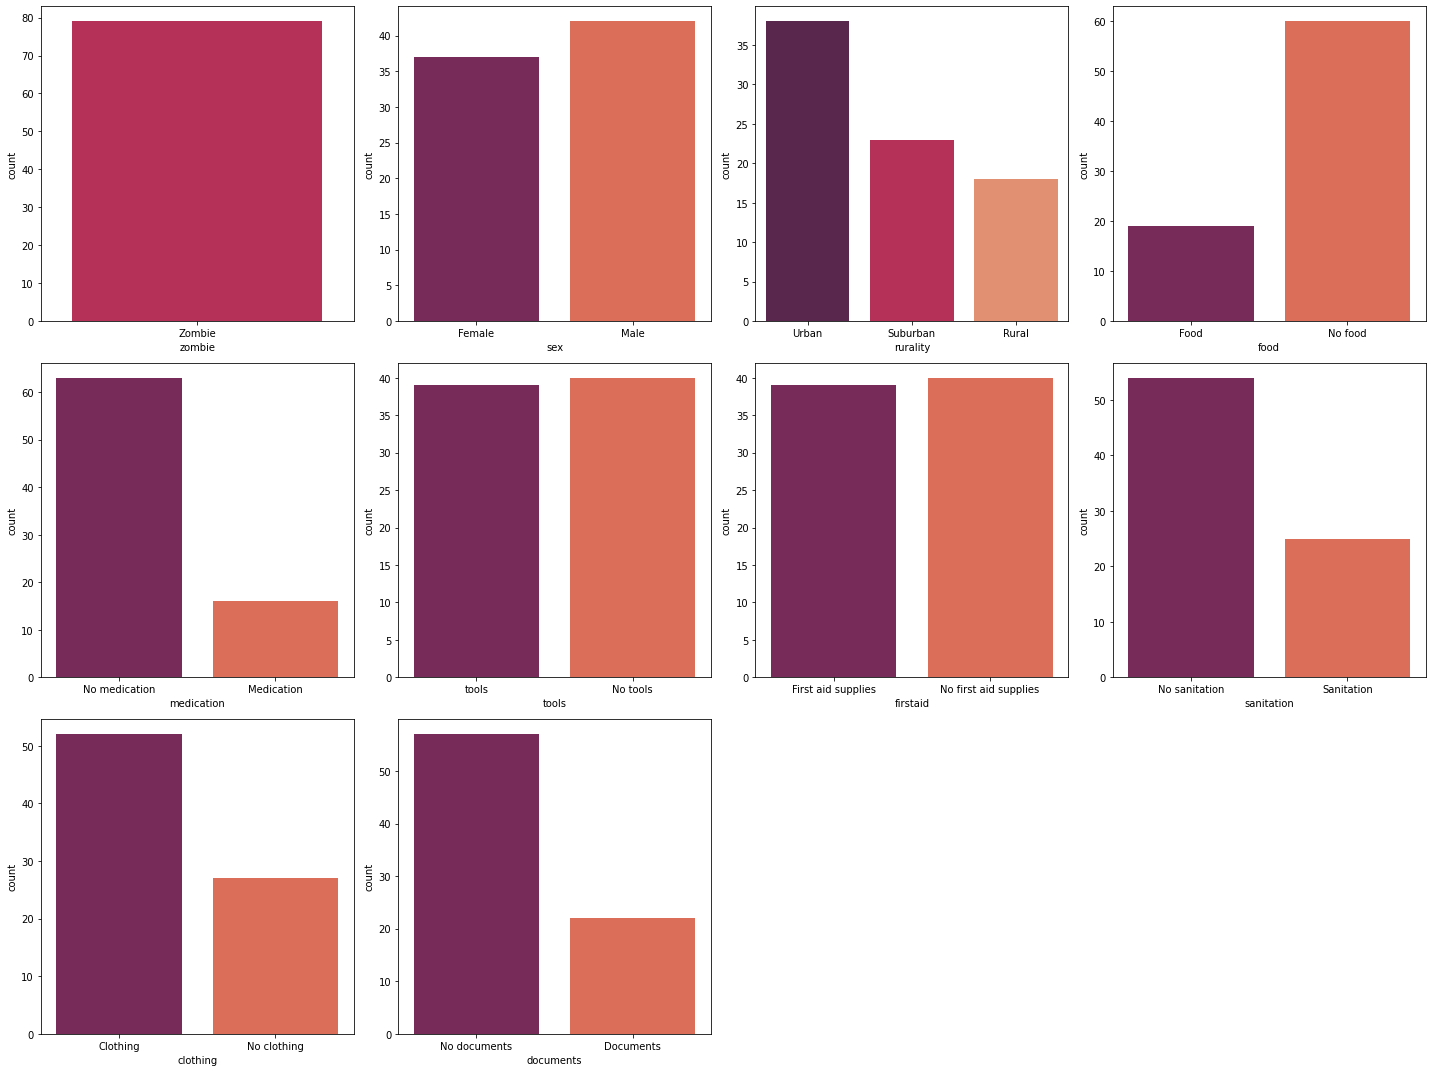

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categoricals:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column][data.zombie=="Zombie"], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**from this countplots we can say that the zombies are more likely to have no clothing,no sanitation and no food**

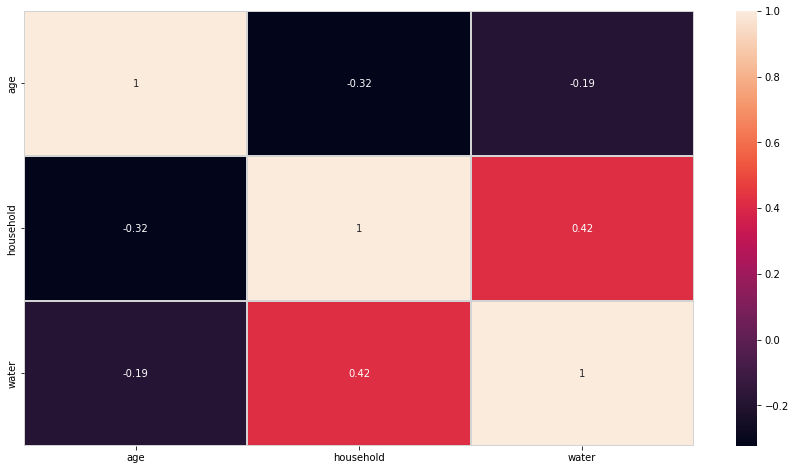

In [17]:
# heatmap of data
#to visualize the correlation between the features

plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

**checking the missing values in our data**

In [18]:
data.isna().sum()


zombie        0
age           0
sex           0
rurality      0
household     0
water         0
food          0
medication    0
tools         0
firstaid      0
sanitation    0
clothing      0
documents     0
dtype: int64

#  [](http://)Label encoder

**encode categorical labels with values between 0 and 1**

**why encoding ?**
Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categoricals:
    data[col]=encoder.fit_transform(data[col])
    
lbdata=data



In [20]:


for i in lbdata.columns:
    print('unique values in "{}":\n'.format(i),lbdata[i].unique())


unique values in "zombie":
 [0 1]
unique values in "age":
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 50 53 54 56 57 58 59 60 61 62 63 65 67 68 69 71 72
 74 75 77 81 49 51 64 66 73 78 80 76 82 85]
unique values in "sex":
 [0 1]
unique values in "rurality":
 [0 2 1]
unique values in "household":
 [1 3 4 2 5 6]
unique values in "water":
 [ 0 24 16  8 40 18 11  9]
unique values in "food":
 [0 1]
unique values in "medication":
 [0 1]
unique values in "tools":
 [0 1]
unique values in "firstaid":
 [0 1]
unique values in "sanitation":
 [1 0]
unique values in "clothing":
 [0 1]
unique values in "documents":
 [1 0]


[ **let's transform our data**
](http://)[](http://) 
**why scaling?**

So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

In [21]:
from sklearn.preprocessing import StandardScaler #StandardScaler standardizes your features.
from sklearn.preprocessing import RobustScaler #RobustScaler centers data but, instead of dividing by the standard deviation, 
from sklearn.preprocessing import MinMaxScaler #

In [22]:
df=pd.DataFrame(lbdata)
df

,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,0,18,0,0,1,0,0,0,0,0,1,0,1
1,0,18,1,0,3,24,0,0,1,0,1,0,1
2,0,18,1,0,4,16,0,0,0,0,1,0,1
3,0,19,1,0,1,0,0,0,1,1,1,0,1
4,0,19,1,2,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,68,1,1,1,0,0,1,0,1,1,0,0
196,1,71,1,1,1,8,1,1,1,0,0,0,1
197,1,76,0,2,1,0,1,1,1,0,1,0,0
198,1,82,1,2,1,0,1,1,0,1,0,1,1


****MinMaxScaler****

In [23]:
MMS=MinMaxScaler()
arr = MMS.fit_transform(df)
mm_scaled_data = pd.DataFrame(arr, columns=df.columns)
mm_scaled_data

,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.000000,1.0,0.0,0.4,0.6,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.000000,1.0,0.0,0.6,0.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.014925,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.0,0.014925,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.746269,1.0,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
196,1.0,0.791045,1.0,0.5,0.0,0.2,1.0,1.0,1.0,0.0,0.0,0.0,1.0
197,1.0,0.865672,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
198,1.0,0.955224,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0


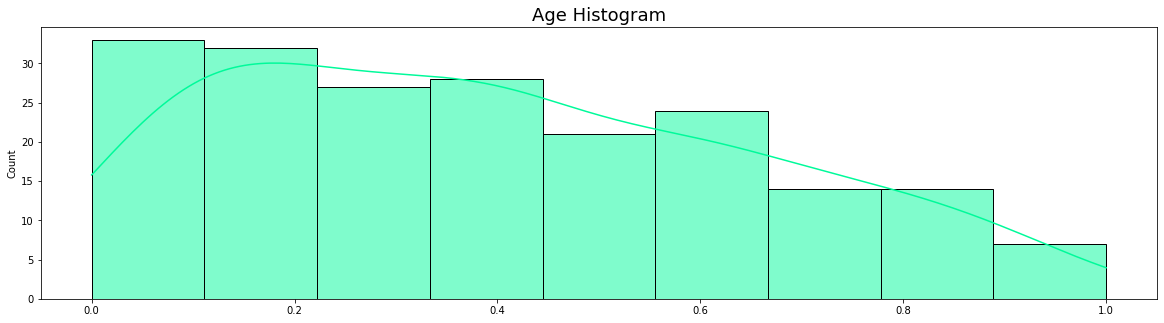

In [24]:
plt.figure(figsize=(20,5))
sns.histplot(data=mm_scaled_data, x="age", kde=True, color="mediumspringgreen")
plt.title("Age Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

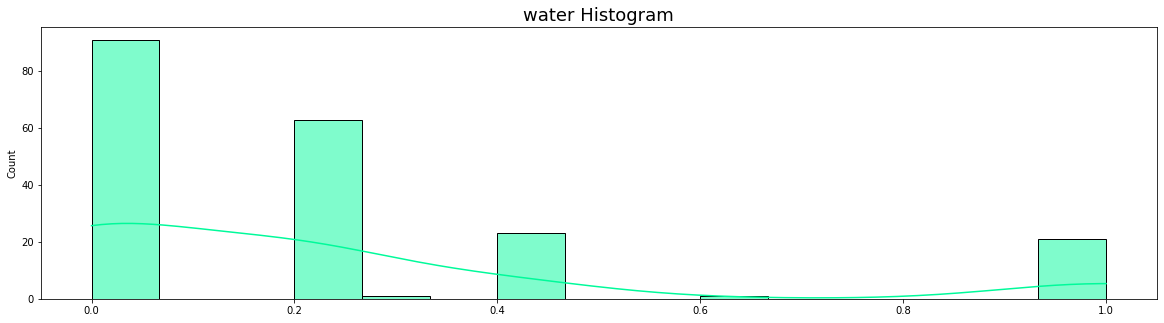

In [25]:
plt.figure(figsize=(20,5))
sns.histplot(data=mm_scaled_data, x="water", kde=True, color="mediumspringgreen")
plt.title("water Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

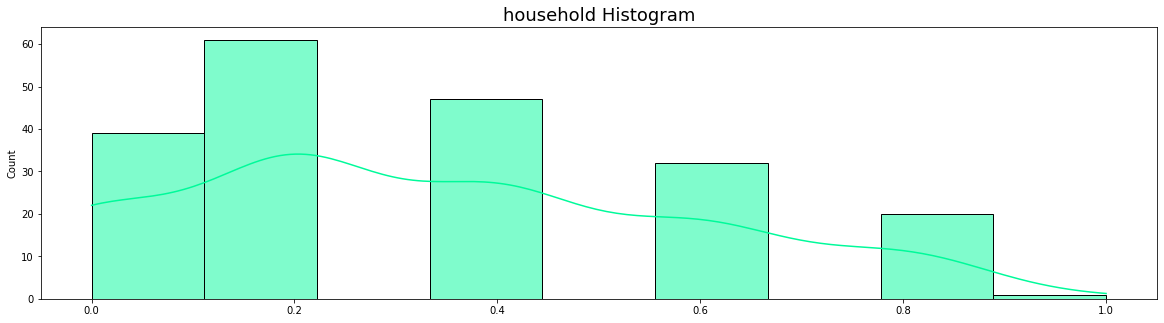

In [26]:
plt.figure(figsize=(20,5))
sns.histplot(data=mm_scaled_data, x="household", kde=True, color="mediumspringgreen")
plt.title("household Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

****StandardScaler****

In [27]:
SS=StandardScaler()
arr = SS.fit_transform(df)
scaled_data = pd.DataFrame(arr, columns=df.columns)
scaled_data


,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,-0.808018,-1.524378,-1.010051,-0.924648,-1.333333,-0.726780,-0.904534,-1.061913,-0.990050,-0.941697,1.020204,-0.766356,0.701810
1,-0.808018,-1.524378,0.990050,-0.924648,0.253968,1.266673,-0.904534,-1.061913,1.010051,-0.941697,1.020204,-0.766356,0.701810
2,-0.808018,-1.524378,0.990050,-0.924648,1.047619,0.602189,-0.904534,-1.061913,-0.990050,-0.941697,1.020204,-0.766356,0.701810
3,-0.808018,-1.466669,0.990050,-0.924648,-1.333333,-0.726780,-0.904534,-1.061913,1.010051,1.061913,1.020204,-0.766356,0.701810
4,-0.808018,-1.466669,0.990050,1.446245,-1.333333,-0.726780,-0.904534,-1.061913,-0.990050,-0.941697,1.020204,1.304877,0.701810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.237597,1.361062,0.990050,0.260798,-1.333333,-0.726780,-0.904534,0.941697,-0.990050,1.061913,1.020204,-0.766356,-1.424887
196,1.237597,1.534188,0.990050,0.260798,-1.333333,-0.062295,1.105542,0.941697,1.010051,-0.941697,-0.980196,-0.766356,0.701810
197,1.237597,1.822732,-1.010051,1.446245,-1.333333,-0.726780,1.105542,0.941697,1.010051,-0.941697,1.020204,-0.766356,-1.424887
198,1.237597,2.168985,0.990050,1.446245,-1.333333,-0.726780,1.105542,0.941697,-0.990050,1.061913,-0.980196,1.304877,0.701810


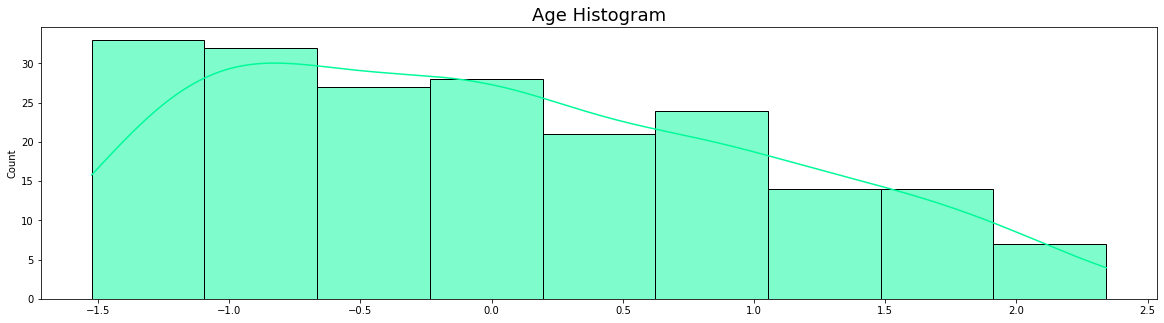

In [28]:
plt.figure(figsize=(20,5))
sns.histplot(data=scaled_data, x="age", kde=True, color="mediumspringgreen")
plt.title("Age Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

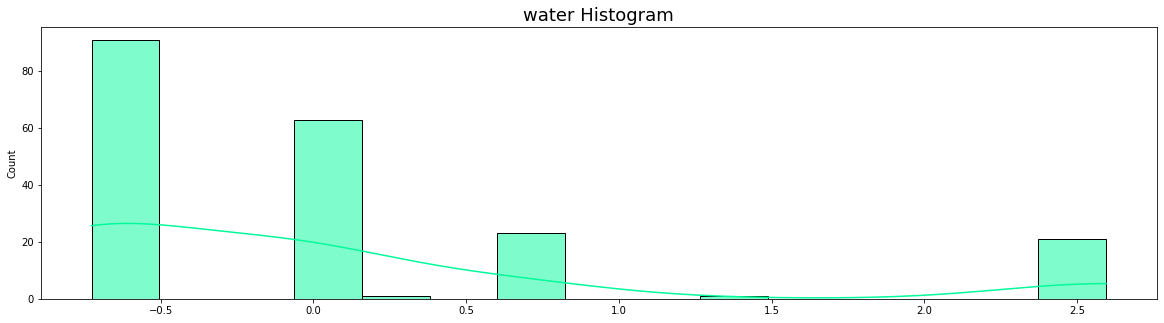

In [29]:
plt.figure(figsize=(20,5))
sns.histplot(data=scaled_data, x="water", kde=True, color="mediumspringgreen")
plt.title("water Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

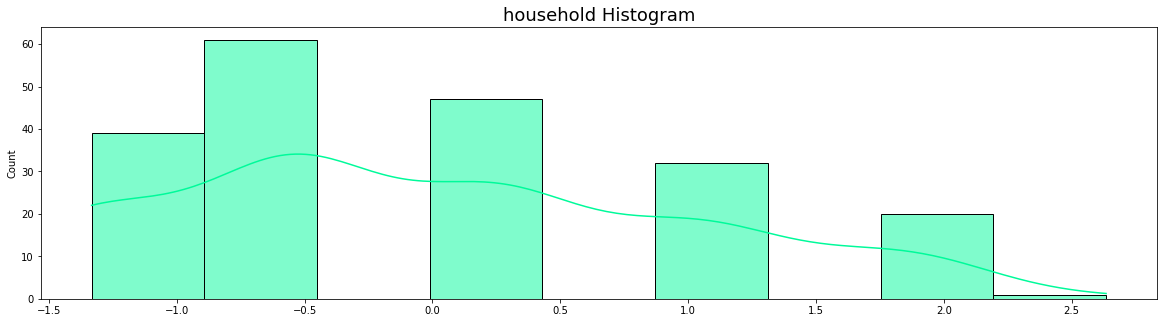

In [30]:
plt.figure(figsize=(20,5))
sns.histplot(data=scaled_data, x="household", kde=True, color="mediumspringgreen")
plt.title("household Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

****Robustscaler****

In [31]:
RS=RobustScaler()
arr = RS.fit_transform(df)
Rscaled_data = pd.DataFrame(arr, columns=df.columns)
Rscaled_data

,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,0.0,-0.827586,-1.0,-0.5,-0.75,-1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,-0.827586,0.0,-0.5,0.25,2.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,-0.827586,0.0,-0.5,0.75,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,-0.793103,0.0,-0.5,-0.75,-1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,-0.793103,0.0,0.5,-0.75,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.896552,0.0,0.0,-0.75,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.0
196,1.0,1.000000,0.0,0.0,-0.75,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
197,1.0,1.172414,-1.0,0.5,-0.75,-1.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.0
198,1.0,1.379310,0.0,0.5,-0.75,-1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


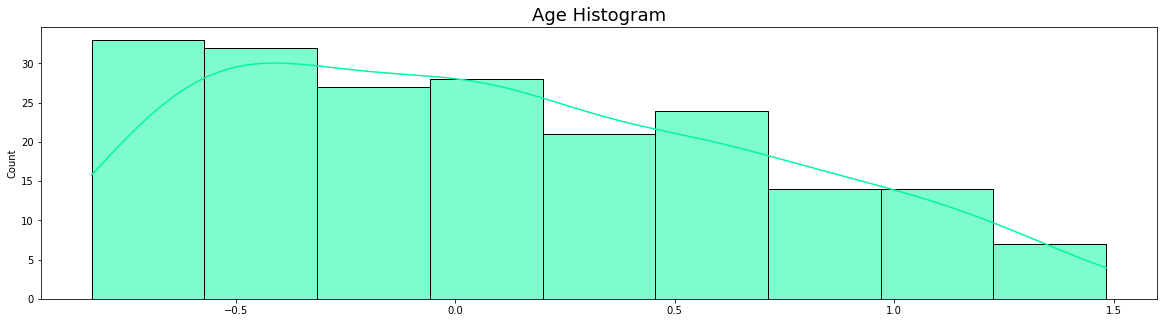

In [32]:
plt.figure(figsize=(20,5))
sns.histplot(data=Rscaled_data, x="age", kde=True, color="mediumspringgreen")
plt.title("Age Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

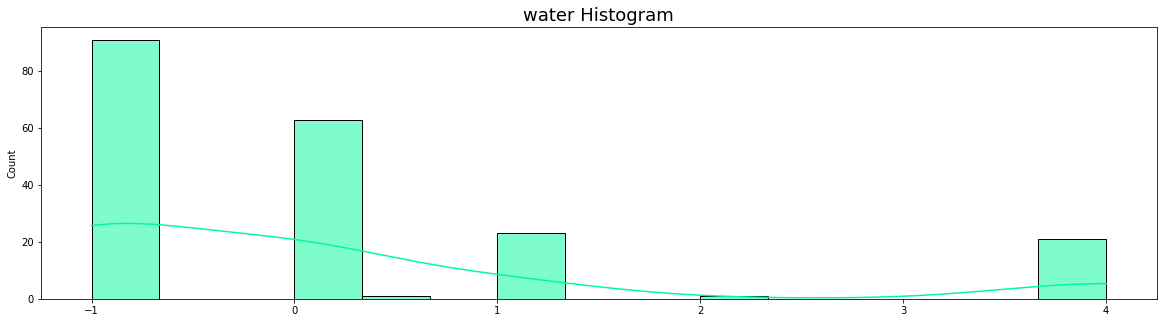

In [33]:
plt.figure(figsize=(20,5))
sns.histplot(data=Rscaled_data, x="water", kde=True, color="mediumspringgreen")
plt.title("water Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

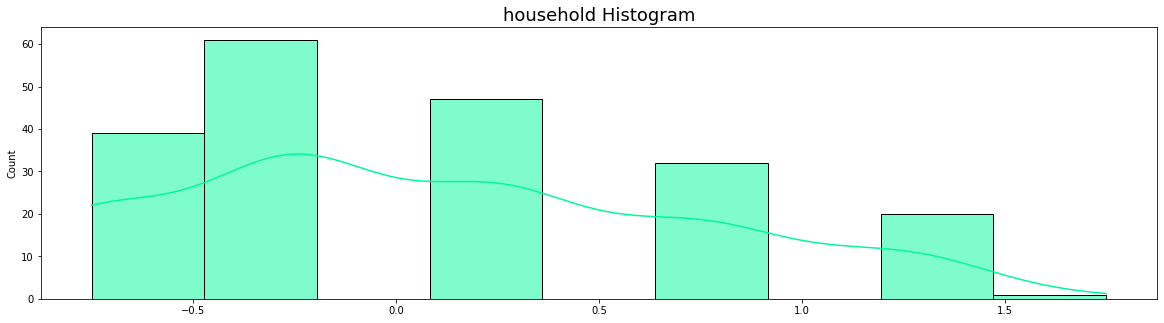

In [34]:
plt.figure(figsize=(20,5))
sns.histplot(data=Rscaled_data, x="household", kde=True, color="mediumspringgreen")
plt.title("household Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

in the next models  we will be  using the robust scaled data 

# [](http://)****logistic regression****

In [35]:
Rscaled_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zombie      200 non-null    float64
 1   age         200 non-null    float64
 2   sex         200 non-null    float64
 3   rurality    200 non-null    float64
 4   household   200 non-null    float64
 5   water       200 non-null    float64
 6   food        200 non-null    float64
 7   medication  200 non-null    float64
 8   tools       200 non-null    float64
 9   firstaid    200 non-null    float64
 10  sanitation  200 non-null    float64
 11  clothing    200 non-null    float64
 12  documents   200 non-null    float64
dtypes: float64(13)
memory usage: 20.4 KB


split the data into features and the target 

In [36]:
from sklearn.metrics import classification_report
X = Rscaled_data.drop(['zombie'], axis=1)

y = Rscaled_data['zombie']

**Split data into separate training and test set**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**LOGISTIC REGRESSION WITH ALL THE FEATURES**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8833
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        34
         1.0       0.91      0.81      0.86        26

    accuracy                           0.88        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.89      0.88      0.88        60



# [](http://)**Logistic Regression with PCA**

now let's apply the PCA 
Principal Component Analysis is used to compress information to store and transmit data more efficiently
https://www.keboola.com/blog/pca-machine-learning a link for a better explanation

Explained Variance Ratio¶
A very useful piece of information is the explained variance ratio of each principal component. It is available via the explained_variance_ratio_ variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [39]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
#apply
X_train = pca.fit_transform(X_train)
#number of components
print(pca.n_components_) 
pca.explained_variance_ratio_

12


array([0.50052926, 0.09578893, 0.07957853, 0.06205678, 0.05022952,
       0.04326434, 0.04126179, 0.03740852, 0.03349783, 0.02513468,
       0.02311903, 0.0081308 ])

In [40]:
X = Rscaled_data.drop(['zombie','documents'], axis=1)#we left only the first 12 features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Logistic Regression accuracy score with the first 12 features: 0.9000
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        34
         1.0       0.92      0.85      0.88        26

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.90      0.90      0.90        60



so using the PCA we managed to improve the accuracy from 0.88 to 0.9

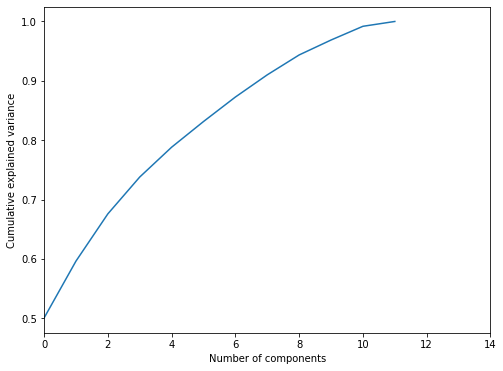

In [41]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Comment
The above plot shows that almost 90% of variance is explained by the first 7 components.

# [](http://)****decision tree****

In [42]:
X = Rscaled_data.drop(['zombie'], axis=1)

y = Rscaled_data['zombie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

 train score  : 1.0
 test score  : 0.7


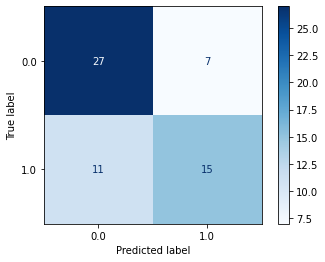

In [43]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dtree = dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(' train score  :', dt.score(X_train, y_train))
print(' test score  :', dt.score(X_test, y_test))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

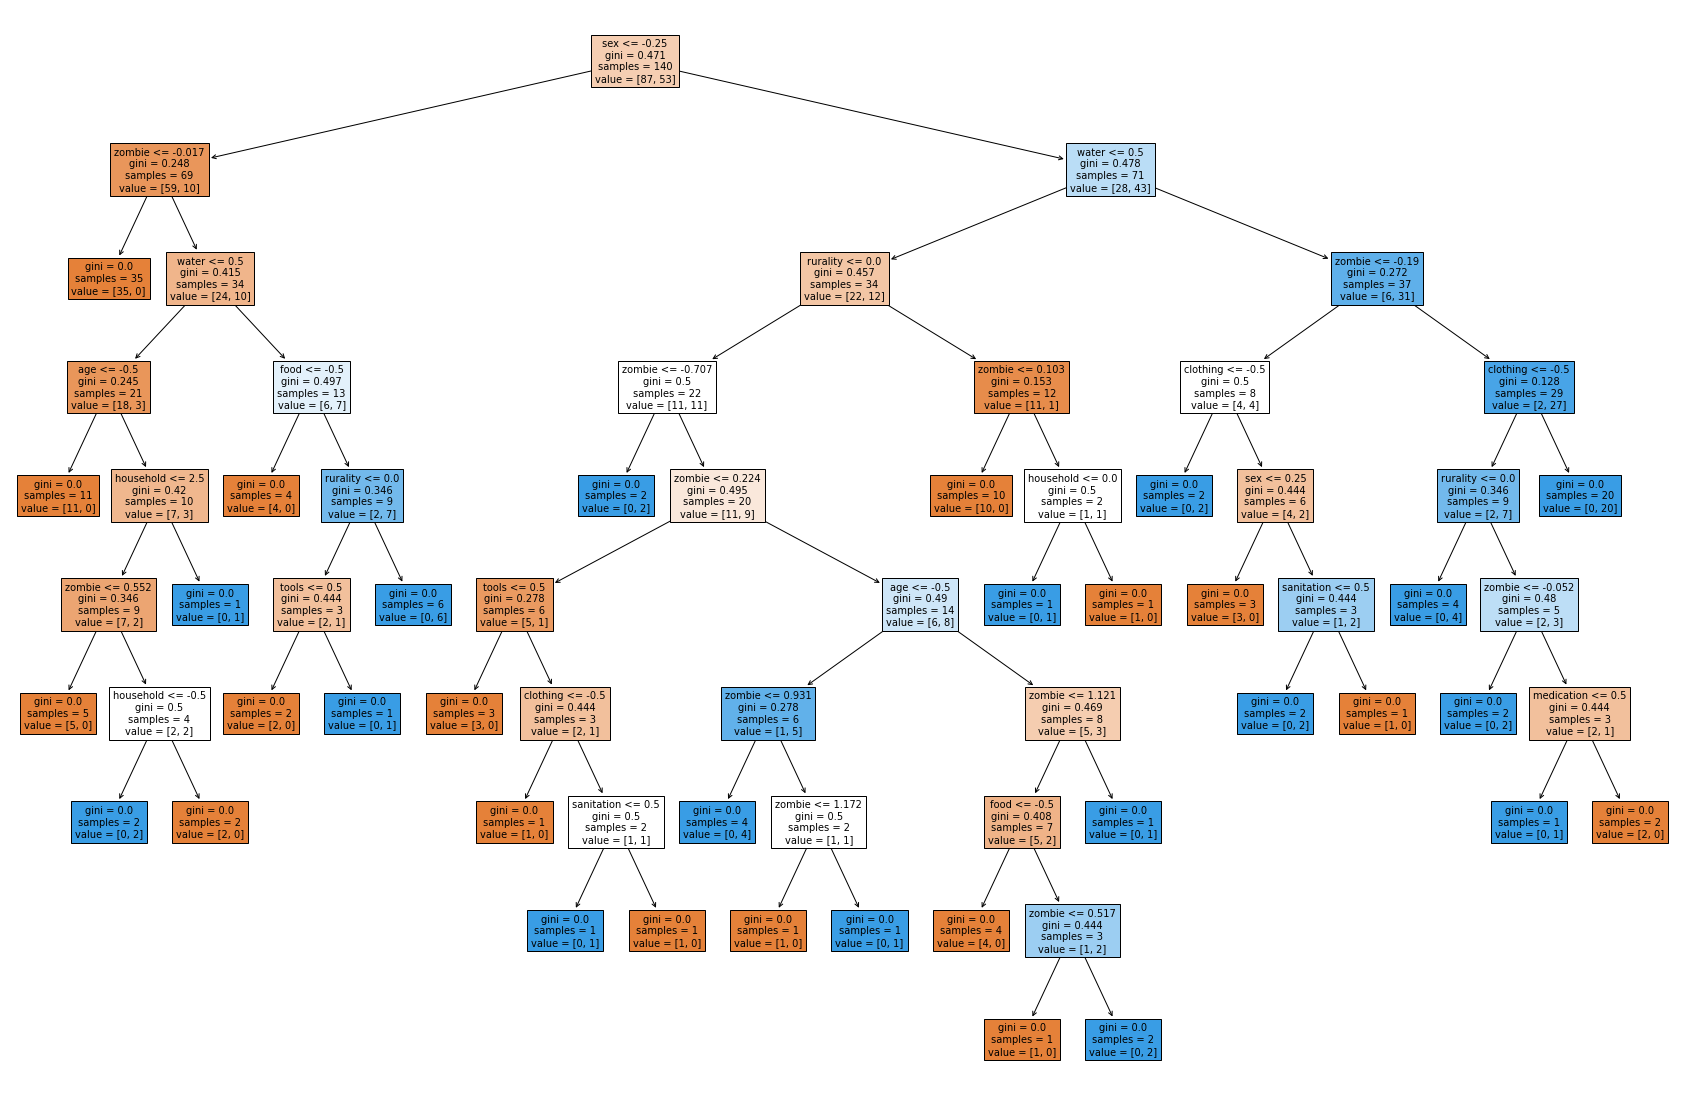

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(dt, feature_names= Rscaled_data.columns, filled=True)
plt.show()

# [](http://)****Random Forest****
random forest is an ensemble of decision trees(n estimators)

In [45]:
X = Rscaled_data.drop(['zombie'], axis=1)

y = Rscaled_data['zombie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [46]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)

In [47]:
print(' train score  :', rf.score(X_train, y_train))
print(' test score  :', rf.score(X_test, y_test))

 train score  : 1.0
 test score  : 0.8166666666666667


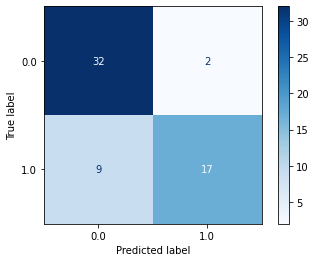

In [48]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# [](http://)**SMOTE+randomforest**

0    121
1     79
Name: zombie, dtype: int64

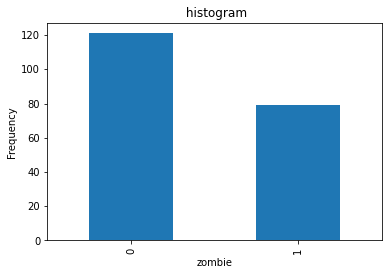

In [49]:
pd.value_counts(data['zombie']).plot.bar()
plt.title(' histogram')
plt.xlabel('zombie')
plt.ylabel('Frequency')
data['zombie'].value_counts()
#imbalanced data

In [50]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 53
Before OverSampling, counts of label '0': 87 



In [51]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

In [52]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (174, 12)
After OverSampling, the shape of train_y: (174,) 

After OverSampling, counts of label '1': 87
After OverSampling, counts of label '0': 87


In [53]:
# Instantiate model 
rf = RandomForestClassifier(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(x_train_res, y_train_res)
y_pred_rf= rf.predict(X_test)

In [54]:
print(' train score  :', rf.score(x_train_res, y_train_res))
print(' test score  :', rf.score(X_test, y_test))

 train score  : 1.0
 test score  : 0.8333333333333334


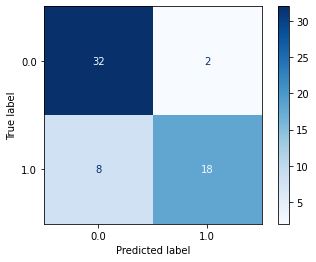

In [55]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

after oversampling the score of the random forest has improved

# [](http://)****FEATURE SELECTION AND XGBOOST****

**XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.**

**1.1. Recursive feature elimination**
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [56]:
#split the data as usual 
X = Rscaled_data.drop(['zombie'], axis=1)

y = Rscaled_data['zombie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [57]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import RFE
#build an XGBoost model
model = XGBRegressor()
# create the RFE model and select 8 attributes
rfe = RFE(estimator=model,n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['age', 'sex', 'rurality', 'household', 'water', 'food', 'medication', 'sanitation']


**1.2. Feature ranking with recursive feature elimination and cross-validation**

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

In [58]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=model, step=1,min_features_to_select=1, cv=10,scoring='neg_mean_absolute_error')
rfecv.fit(X_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))


Optimal number of features: 3
Selected features: ['rurality', 'food', 'medication']
